In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [26]:
with_mask=np.load('with.npy')
without_mask=np.load('without.npy')

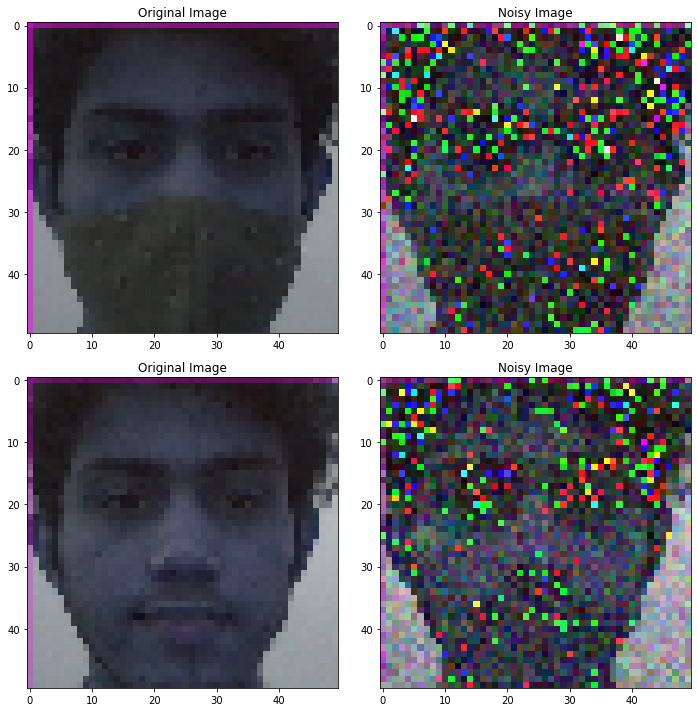

In [27]:
# Set up matplotlib figure with two subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Display images before and after adding noise
for i, img_array in enumerate([with_mask[0], without_mask[0]]):
    axs[i, 0].imshow(img_array)
    axs[i, 0].set_title('Original Image')
    
    # Add noise to the image
    noisy_img = img_array + np.random.normal(0, 25, img_array.shape).astype(np.uint8)
    axs[i, 1].imshow(noisy_img)
    axs[i, 1].set_title('Noisy Image')

plt.tight_layout()
plt.show()

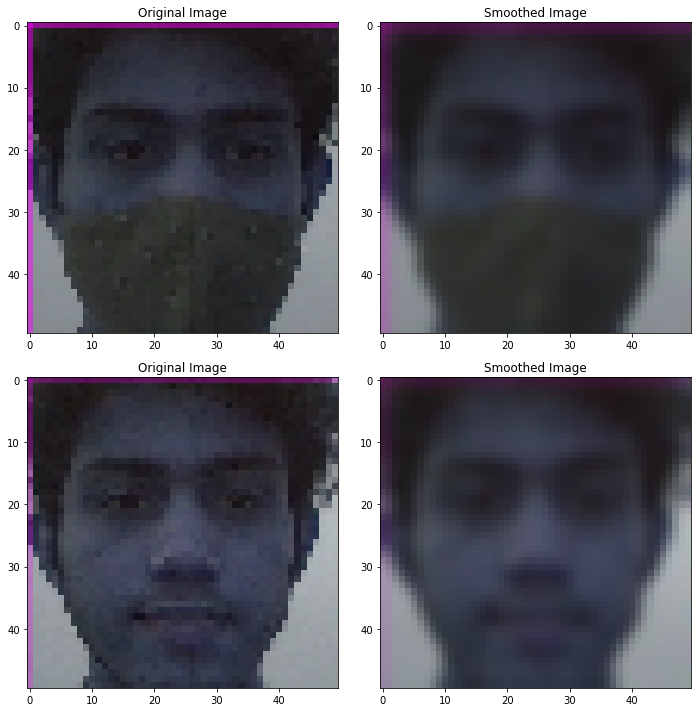

In [28]:
# Set up matplotlib figure with two subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Display images before and after smoothing
for i, img_array in enumerate([with_mask[0], without_mask[0]]):
    axs[i, 0].imshow(img_array)
    axs[i, 0].set_title('Original Image')
    
    # Apply smoothing (Gaussian blur)
    smoothed_img = cv2.GaussianBlur(img_array, (5, 5), 0)
    axs[i, 1].imshow(smoothed_img)
    axs[i, 1].set_title('Smoothed Image')

plt.tight_layout()
plt.show()

In [29]:
with_mask.shape

(200, 50, 50, 3)

In [30]:
without_mask.shape

(200, 50, 50, 3)

In [31]:
# Flatten the data and concatenate

In [32]:
with_mask = with_mask.reshape(200, -1)
without_mask = without_mask.reshape(200, -1)


In [33]:
with_mask.shape 

(200, 7500)

In [34]:
without_mask.shape

(200, 7500)

In [35]:
X = np.vstack((with_mask, without_mask))

In [36]:
X.shape

(400, 7500)

In [37]:
# Create labels

In [38]:
labels=np.zeros(X.shape[0])

In [39]:
labels[200:]=1.0

In [40]:
# Define names dictionary

In [41]:
names={0:'Mask',1:'No Mask'}

In [42]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [45]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_pca, labels, test_size=0.25)

# Initialize SVM classifier
svm = SVC()

# Fit SVM classifier with PCA-transformed data
svm.fit(x_train, y_train)

SVC()

In [46]:
# Predict on the test set
y_pred = svm.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred)

0.98

In [48]:
# Initialize video capture


In [50]:
# Initialize video capture
haar_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
capture = cv2.VideoCapture(0)
data = []

while True:
    flag, img = capture.read()
    if flag:
        # Smoothing and Sharpening
        smoothed_img = cv2.GaussianBlur(img, (5, 5), 0)
        kernel_sharpening = np.array([[-1,-1,-1], 
                                       [-1, 9,-1],
                                       [-1,-1,-1]])
        sharpened_img = cv2.filter2D(smoothed_img, -1, kernel_sharpening)
        
        # Convert to grayscale for face detection
        gray_img = cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2GRAY)
        faces = haar_data.detectMultiScale(gray_img)
        
        for x, y, w, h in faces:
            cv2.rectangle(sharpened_img, (x, y), (x+w, y+h), (255, 0, 255), 4)
            face = sharpened_img[y:y+h, x:x+w, :]
            face = cv2.resize(face, (50, 50))
            face = face.flatten().reshape(1, -1)
            face_pca = pca.transform(face)  # Apply PCA transformation
            pred = svm.predict(face_pca)[0]
            n = names[int(pred)]
            print(n)
            cv2.putText(sharpened_img, n, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)
            if len(data) < 400:  
                data.append(face)
        
        cv2.imshow('result', sharpened_img)
        key = cv2.waitKey(2)
        if key == 27 or len(data) >= 400:  
            break

# Release video capture
capture.release()
cv2.destroyAllWindows()

No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
